In [ ]:
%autosave 30

Autosaving every 30 seconds


# **Use Case Summary**
## Objective Statement
- Get insight about how much customer spend every month on every year
- Get insight about how much customer spend every month on 2011
- Get insight about how much customer spend every month on 2012
- Get insight about how much customer spend every month on 2013
- Get insight about how much customer spend every month on 2014
- Get insight about how big they spend on a transaction
- Get insight about the ratio between customer segment
- Get insight about trend on every year
- Get business insight about how, when and whom to promote business on the right time
- Get insight about marketing strategy or planning based on segmentation

## Challenges

- There is data that has an inappropriate data type

### Methodology / Analytic Technique

- Descriptive analysis
- Graph analysis
- RFM(Recency, Frequency, Monetary) Model

## Business Benefit
- Help Business to make decision about marketing strategy based on customer segmentation
- Help business to focus what customer need


## Expected Outcome
- Get to know how many customer spend every month on every year on our business
- Get to know how many customer spend every month on 2011
- Get to know how many customer spend every month on 2012
- Get to know how many customer spend every month on 2013
- Get to know how many customer spend every month on 2014
- Get to know how big they spend on a transaction
- Get to know the ratio between customer segment
- Get to know trend on every year
- Get to know when, how, and for whom the product will be promote
- Recommendation based on customer segmentation

# Business Understanding

Online retail or as known as online shopping refers to a form of electronic commerce where consumers directly buy goods or services from a seller via the Internet rather. Customers usually visit the company's website, select a product, enter payment information and shipping details, and then order the product. All of these steps are completed entirely online.

This case has some business question using the data : 
- How many customer spend every month on every year?
- How big they are spend on a transaction?
- How about Customer segmentation based on customer spend?
- How about recommendation based customer segmentation?

# Data Understanding
- Order data is a record of customer purchase data from January 4, 2011 to December 31, 2014
- Source Data :  https://www.kaggle.com/datasets/siddinho/sample-orders-dataset-retail
- The dataset has 4 columns and 5009 rows.
- Data Dictionary :
 - order_date : Date when customer order
 - order_id : ID customer order for each transaction 
 - customer : Name of Customer
 - grand_total : total transaction for each customer

# Data Preparation
Code Used:
- Python Version: 3.7.15
- Packages: Pandas, Numpy, Matplotlib, Seaborn, Datetime, Sklearn,Scipy, Plotly and Feature Engine 

# Data Cleansing

There is 1 column that has an inappropriate data type so it is necessary to adjust the data type.

# Package Installation

In [ ]:
! pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 22.7 MB/s 


# Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import feature_engine 
from feature_engine.outliers import Winsorizer
import plotly.offline as pyoff
import plotly.graph_objs as go


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

# Data Profiling

In [ ]:
df = pd.read_csv('data_orders.csv')
df.head()

,order_date,order_id,customer,grand_total
0,9/7/2011,CA-2011-100006,Dennis Kane,378
1,7/8/2011,CA-2011-100090,Ed Braxton,699
2,3/14/2011,CA-2011-100293,Neil Franzšsisch,91
3,1/29/2011,CA-2011-100328,Jasper Cacioppo,4
4,4/8/2011,CA-2011-100363,Jim Mitchum,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   5009 non-null   object
 1   order_id     5009 non-null   object
 2   customer     5009 non-null   object
 3   grand_total  5009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


In [ ]:
df.isna().sum()

order_date     0
order_id       0
customer       0
grand_total    0
dtype: int64

In [ ]:
df.describe()

,grand_total
count,5009.000000
mean,458.626672
std,954.729307
min,1.000000
25%,38.000000
50%,152.000000
75%,512.000000
max,23661.000000


Based on the data above, we can see that the average customer purchases products with a total price abput **458 dollar**, the customer with the lowest purchase is at **1 dollar** and the highest purchase is at **23661 dollar**

# Data Cleansing

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['OrderYearMonth'] = df['order_date'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['order_date'].dt.strftime('%Y-%m')
df['Year'] = df['order_date'].dt.strftime('%Y')

In [ ]:
df.head()

,order_date,order_id,customer,grand_total,OrderYearMonth,Date,Year
0,2011-09-07,CA-2011-100006,Dennis Kane,378,201109,2011-09,2011
1,2011-07-08,CA-2011-100090,Ed Braxton,699,201107,2011-07,2011
2,2011-03-14,CA-2011-100293,Neil Franzšsisch,91,201103,2011-03,2011
3,2011-01-29,CA-2011-100328,Jasper Cacioppo,4,201101,2011-01,2011
4,2011-04-08,CA-2011-100363,Jim Mitchum,21,201104,2011-04,2011


# EDA

In [ ]:
print(df['order_date'].min())
print(df['order_date'].max())

2011-01-04 00:00:00
2014-12-31 00:00:00


Order data is a record of customer purchase data from January 4, 2011 to December 31, 2014

In [ ]:
# agregrat order by month

df_agg = df.groupby(['Year','Date']).grand_total.sum()
df_agg.head()

Year  Date   
2011  2011-01    13949
      2011-02     4810
      2011-03    55695
      2011-04    28298
      2011-05    23647
Name: grand_total, dtype: int64

In [ ]:
# converting series to dataframe and resetting index

df_agg = pd.DataFrame(df_agg)
df_agg = df_agg.reset_index()
df_agg.head()

,Year,Date,grand_total
0,2011,2011-01,13949
1,2011,2011-02,4810
2,2011,2011-03,55695
3,2011,2011-04,28298
4,2011,2011-05,23647


In [ ]:
# monthly grand_total

dfgrand_total=df.groupby(['OrderYearMonth'])['grand_total'].sum().reset_index()
dfgrand_total.head()

,OrderYearMonth,grand_total
0,201101,13949
1,201102,4810
2,201103,55695
3,201104,28298
4,201105,23647


In [ ]:
def plot_df(df, x, y, title="",xlabel="Date", ylabel="Quantity", dpi = 100):
  plt.figure(figsize=(16,5), dpi=dpi)
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.plot(x,y, color='#404258', marker = 'o')
  plt.show()

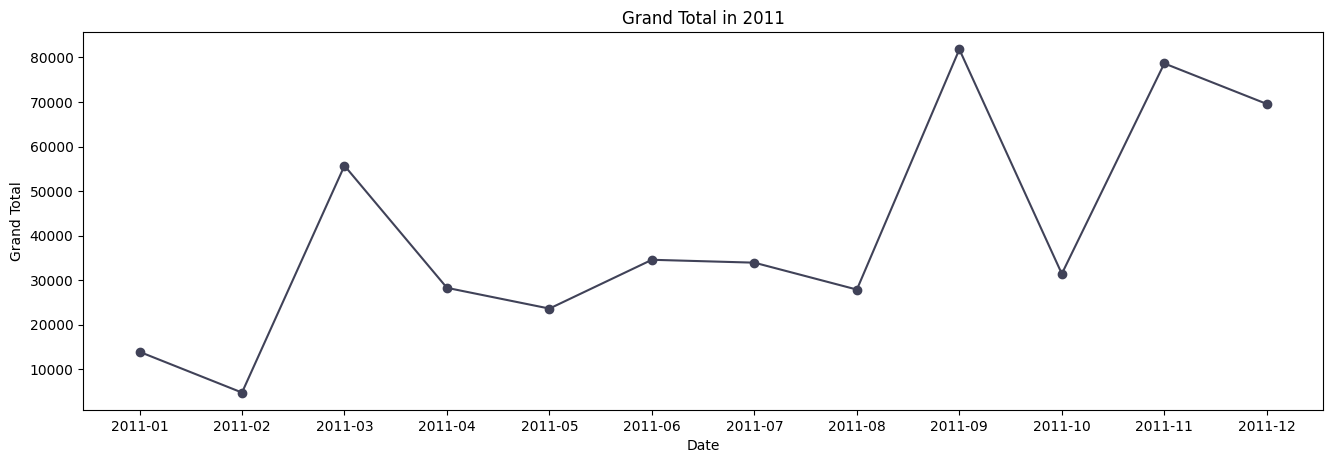

In [ ]:
plot_df(df_agg.query("Year == '2011'"), x = df_agg.query("Year == '2011'").Date, y=df_agg.query("Year == '2011'").grand_total, title ='Grand Total in 2011', ylabel="Grand Total")

In [ ]:
p_increase = ((df_agg[df_agg['Date']=='2011-12'].grand_total.iloc[0]-df_agg[df_agg['Date']=='2011-01'].grand_total.iloc[0])/df_agg[df_agg['Date']=='2011-01'].grand_total.iloc[0])*100
print('The percentage increase on customer spend by annualy : %.2f'%p_increase)

The percentage increase on customer spend by annualy : 398.58


Based on the graph above, it can be seen that in 2011, the trend of total customer purchases increased, although in 2011 there was a **significant decrease** in the second month which reached **the lowest point of 4810**, and **reached the peak/all time high 2011** in the 9th month of the year which **reached 81784**. On an annual basis, **Customer spend increased by 398.58%**

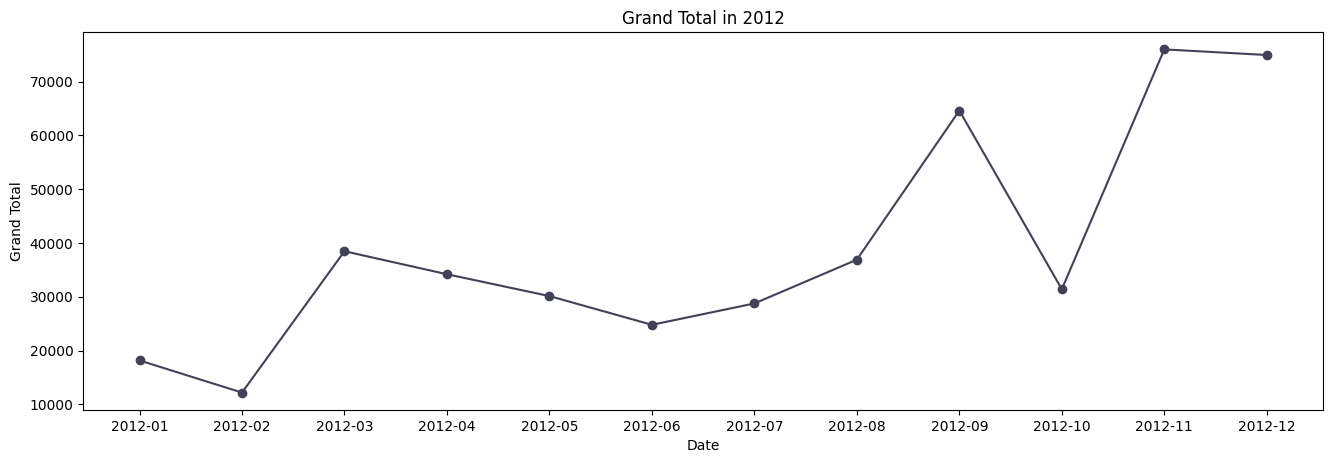

In [ ]:
plot_df(df_agg.query("Year == '2012'"), x = df_agg.query("Year == '2012'").Date, y=df_agg.query("Year == '2012'").grand_total, title ='Grand Total in 2012', ylabel="Grand Total")

In [ ]:
p_increase = ((df_agg[df_agg['Date']=='2012-12'].grand_total.iloc[0]-df_agg[df_agg['Date']=='2012-01'].grand_total.iloc[0])/df_agg[df_agg['Date']=='2012-01'].grand_total.iloc[0])*100
print('The percentage increase on customer spend by annualy : %.2f'%p_increase)

The percentage increase on customer spend by annualy : 312.23


Based on the graph above, it can be seen that in 2012, the trend of total customer purchases increased, although in 2012 there was a **significant decrease** in the second month which reached **the lowest point of 12211**, and **reached the peak/all time high 2012** in the 11th month of the year which **reached 75968**. On an annual basis, **Customer spend increased by 312.23%**

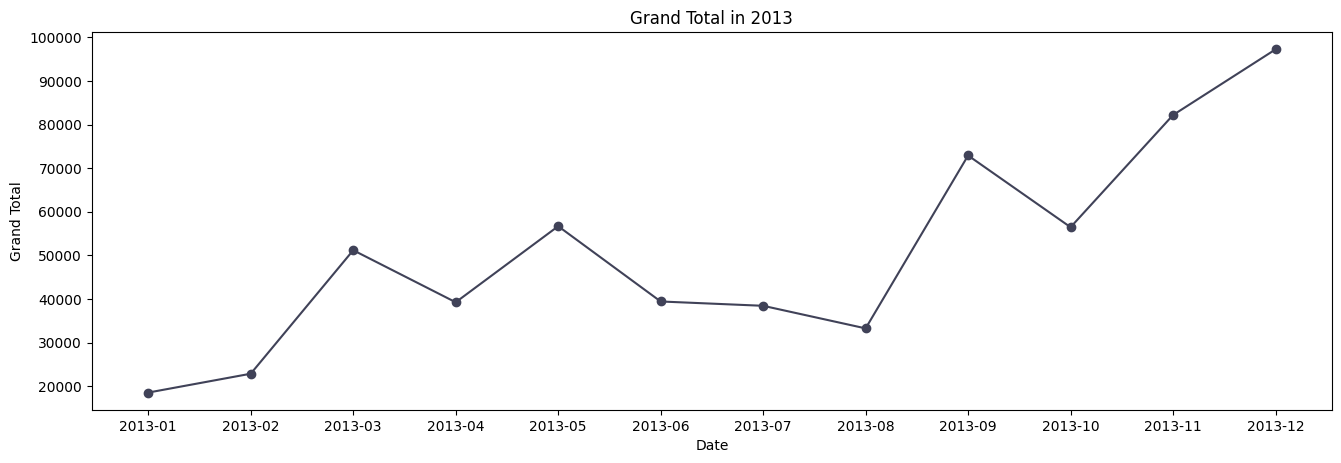

In [ ]:
plot_df(df_agg.query("Year == '2013'"), x = df_agg.query("Year == '2013'").Date, y=df_agg.query("Year == '2013'").grand_total, title ='Grand Total in 2013', ylabel="Grand Total")

In [ ]:
p_increase = ((df_agg[df_agg['Date']=='2013-12'].grand_total.iloc[0]-df_agg[df_agg['Date']=='2013-01'].grand_total.iloc[0])/df_agg[df_agg['Date']=='2013-01'].grand_total.iloc[0])*100
print('The percentage increase on customer spend by annualy : %.2f'%p_increase)

The percentage increase on customer spend by annualy : 424.42


Based on the graph above, it can be seen that in 2013, the trend of total customer purchases increased, although in 2013 there was a **significant decrease** in the first month which reached **the lowest point of 18543**, and **reached the peak/all time high 2013** in the last month of the year which **reached 97244**. On an annual basis, **Customer spend increased by 424.42%**

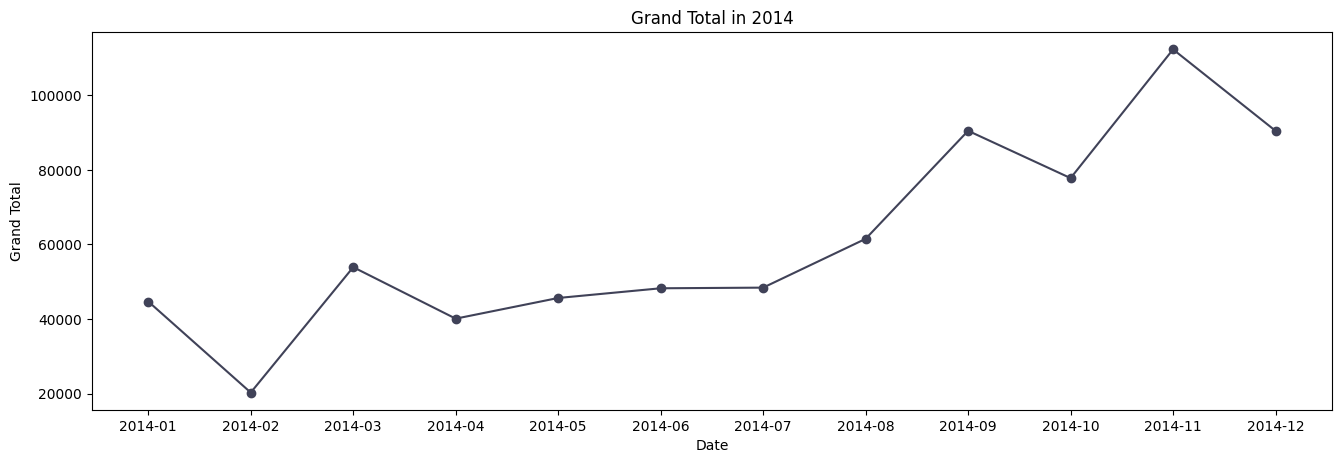

In [ ]:
plot_df(df_agg.query("Year == '2014'"), x = df_agg.query("Year == '2014'").Date, y=df_agg.query("Year == '2014'").grand_total, title ='Grand Total in 2014', ylabel="Grand Total")

In [ ]:
p_increase = ((df_agg[df_agg['Date']=='2014-12'].grand_total.iloc[0]-df_agg[df_agg['Date']=='2014-01'].grand_total.iloc[0])/df_agg[df_agg['Date']=='2014-01'].grand_total.iloc[0])*100
print('The percentage increase on customer spend by annualy : %.2f'%p_increase)

The percentage increase on customer spend by annualy : 102.38


Based on the graph above, it can be seen that in 2014, the trend of total customer purchases increased, although in 2014 there was a **significant decrease** in the second month which reached **the lowest point of 44708**, and **reached the peak/all time high 2014** in the 11th month of the year which **reached 112329**. On an annual basis, **Customer spend increased by 102.38%**

In [ ]:
df_agg['Date'] = pd.to_datetime(df_agg['Date'])

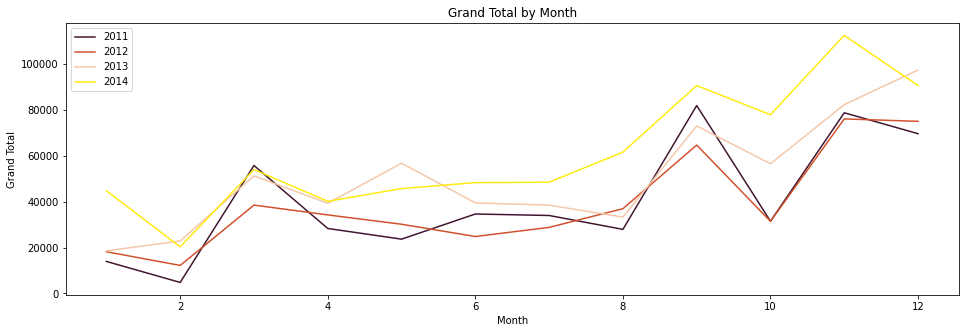

In [ ]:
df_2011 = df_agg[df_agg['Date'].dt.year==2011]
df_2012 = df_agg[df_agg['Date'].dt.year==2012]
df_2013 = df_agg[df_agg['Date'].dt.year==2013]
df_2014 = df_agg[df_agg['Date'].dt.year==2014]

plt.figure(figsize=(16,5))
plt.plot(df_2011.Date.dt.month, df_2011.grand_total, label=2011, color='#411530')
plt.plot(df_2012.Date.dt.month, df_2012.grand_total, label=2012, color='#D1512D')
plt.plot(df_2013.Date.dt.month, df_2013.grand_total, label=2013, color='#F5C7A9')
plt.plot(df_2014.Date.dt.month, df_2014.grand_total, label=2014, color='#FFEA11')
plt.title("Grand Total by Month")
plt.xlabel('Month')
plt.ylabel('Grand Total')
plt.legend()
plt.show()

From the graph above, Customer purchase data 'order data' from January 2011 to 2014 is fluctuated. In 2011 the highest purchase was in September with a total purchase of **81,784 k** and the lowest was of **4810** in February, in 2012 the highest purchase was in November with a total purchase of **75,968 k** and the lowest was in February with a value of **12,211 k** , in 2013 the highest purchase was worth **97,244 k** in December and the lowest was in January with a value of **18,543 k**, and in 2014 the highest purchase was in November with a total of **112.293 k** and the lowest in February with a value of **20,287 k**. Overall, the highest purchase in the period 2011 to 2014 was in November 2014 with a value of **112.293 k** and the lowest was in February 2011 with a total purchase of **4810**.
From the data above, there is also a visible pattern where in the three-year period the lowest purchases are generally at the beginning of the year,  between January and February, while the highest purchases are at the end of the year between September and December.



# Preprocessing Modeling

In [ ]:
# timebound

print(df["order_date"].min())
print(df["order_date"].max())
print("The data is from 3 year transaction")

2011-01-04 00:00:00
2014-12-31 00:00:00
The data is from 3 year transaction


order data is a record of customer purchase data in 3 years transcation from January 4, 2011 to December 31, 2014

last order is 2014-12-31, we will use this date to calulate recency

In [ ]:
NOW = dt.date(2014,12,31)
df['Date'] = pd.DatetimeIndex(df.order_date).date

In [ ]:
# recency

df_recency = df.groupby(['customer'], as_index = False)['Date'].max()
df_recency.columns = ['customer', 'Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,customer,Recency
0,Aaron Bergman,415
1,Aaron Hawkins,12
2,Aaron Smayling,88
3,Adam Bellavance,54
4,Adam Hart,34


In [ ]:
# frequency - monetary

FM_Table = df.groupby('customer').agg({'order_id'   : lambda x:len(x), 
                                        'grand_total'      : lambda x:x.sum()})
FM_Table.rename(columns = {'order_id' : 'Frequency',
                          'grand_total' : 'Monetary'}, inplace = True)

FM_Table.head()

,Frequency,Monetary
customer,,
Aaron Bergman,3,887
Aaron Hawkins,7,1744
Aaron Smayling,7,3050
Adam Bellavance,8,7756
Adam Hart,10,3249


In [ ]:
RFM_Table = df_recency.merge(FM_Table, left_on = 'customer', right_on = 'customer')
RFM_Table.head()

,customer,Recency,Frequency,Monetary
0,Aaron Bergman,415,3,887
1,Aaron Hawkins,12,7,1744
2,Aaron Smayling,88,7,3050
3,Adam Bellavance,54,8,7756
4,Adam Hart,34,10,3249


# Modeling

In [ ]:
quantiles = RFM_Table.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()

In [ ]:
segmented_rfm = RFM_Table.copy()

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    

In [ ]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args= ('Recency', quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args= ('Frequency', quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args= ('Monetary', quantiles))
segmented_rfm.head()

,customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,Aaron Bergman,415,3,887,4,4,4
1,Aaron Hawkins,12,7,1744,1,2,3
2,Aaron Smayling,88,7,3050,3,2,2
3,Adam Bellavance,54,8,7756,2,2,1
4,Adam Hart,34,10,3249,2,1,2


In [ ]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [ ]:
segmented_rfm.head()

,customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,Aaron Bergman,415,3,887,4,4,4,444
1,Aaron Hawkins,12,7,1744,1,2,3,123
2,Aaron Smayling,88,7,3050,3,2,2,322
3,Adam Bellavance,54,8,7756,2,2,1,221
4,Adam Hart,34,10,3249,2,1,2,212


In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [ ]:
segmented_rfm.head()

,customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,Aaron Bergman,415,3,887,4,4,4,444,12
1,Aaron Hawkins,12,7,1744,1,2,3,123,6
2,Aaron Smayling,88,7,3050,3,2,2,322,7
3,Adam Bellavance,54,8,7756,2,2,1,221,5
4,Adam Hart,34,10,3249,2,1,2,212,5


In this RFM Model assigns a score of 1-4 (from best to worst) for customers in each of the three categories. The best RFM score is the one with the smallest values for each variable, we use a 1 to 4 scale for recency, frequency, and monetary, with 1 being the highest, then the perfect RFM score is 111.

Customer who get score **1 for R_quartile** means that the customer has **recently** made a purchase from the company. From the data above we can take the example for customer Aaron Hawkons who get **1 score for R_quartile**, he just made a last purchase from the company  **12 days ago**, it's different from Aaron Bergman who get score **4 for R_quartile** because he made the last purchase from the company **415 days ago**, which mean more than one year ago.

Customer who get score **1 for F_quartile** means that the customer make a high frequent purchase from the company. From the data above we can take the example for customer Adam Hart who get **1 score fot F_quartile**, he made a purchase with **10 frequency**, it's different from Aaron Bergman who get score **4 for F_quartile** because he made purchase from the company wih **4 frequency** which is lower than Adam Hart.

Customer who get score **1 for M_quartile** means that the customer spend big money for purchase from the company. From the data above we can take the example for customer Adam Bellavance who get **1 score for M_quartile**, he spend money **775 dollar** for purchase product from company, it's different from Aaron Bergman who get score **4 for M_quartile** because he spend lower than Adam Bellanvance for purchasing from the company with **887 dollar**






# Labelling

In [ ]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  30
Loyal Customers:  159
Big Spenders:  198
Almost Lost:  2
Lost Customers:  31
Lost Cheap Customers:  67


In [ ]:
label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [ ]:
segmented_rfm['Label'] = label

In [ ]:
segmented_rfm['Label'].value_counts()

Others                  409
Loyal Customers         129
Big Spenders            125
Lost Cheap Customers     67
Lost Customers           31
Best Customers           30
Almost Lost               2
Name: Label, dtype: int64

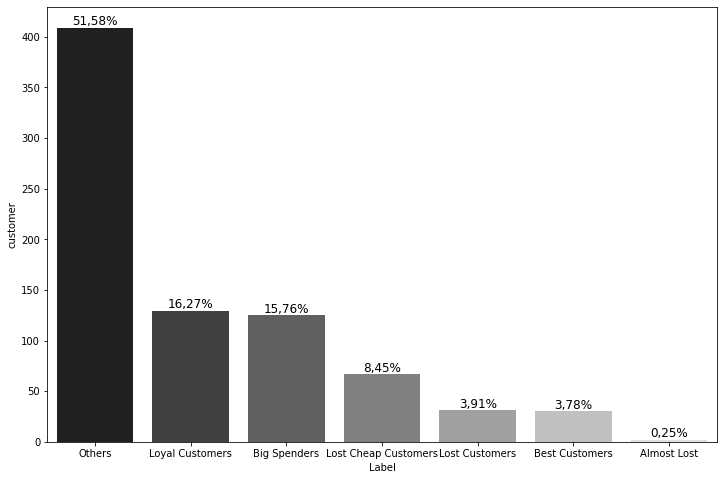

In [ ]:
sq1 = segmented_rfm.groupby('Label')['customer'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize= (12,8))
# sq1.drop([0], inplace = True)
sns.barplot(data=sq1, x = 'Label', y = 'customer', palette = 'gray')

plt.text(0, 415, '51,58%', ha='center', va='center', fontsize=12)
plt.text(1, 136, '16,27%', ha='center', va='center', fontsize=12)
plt.text(2, 131, '15,76%', ha='center', va='center', fontsize=12)
plt.text(3, 73, '8,45%', ha='center', va='center', fontsize=12)
plt.text(4, 37, '3,91%', ha='center', va='center', fontsize=12)
plt.text(5, 36, '3,78%', ha='center', va='center', fontsize=12)
plt.text(6, 8, '0,25%', ha='center', va='center', fontsize=12);

In [ ]:
Others = 409
Loyal_Customers = 129
Big_Spenders=125
Lost_Cheap_Customers =67
Lost_Customers=31
Best_Customers=30
Almost_Lost =2

total = Others+Loyal_Customers+Big_Spenders+Lost_Cheap_Customers+Lost_Customers+Best_Customers+Almost_Lost
p_others = Others/total*100
p_Loyal_Customers = Loyal_Customers/total * 100
p_Big_Spenders= Big_Spenders/total * 100
p_Lost_Cheap_Customers = Lost_Cheap_Customers/total * 100
p_Lost_Customers = Lost_Customers/total * 100
p_Best_Customers = Best_Customers/total * 100
p_Almost_Lost = Almost_Lost/total * 100
print("Persentage of 'Others' is %.2f percent from all customer"%p_others)
print("Persentage of 'Loyal Customer' is %.2f percent from all customer"%p_Loyal_Customers)
print("Persentage of 'Big Spenders' is %.2f percent from all customer"%p_Big_Spenders)
print("Persentage of 'Lost Cheap Customers' is %.2f percent from all customer"%p_Lost_Cheap_Customers)
print("Persentage of 'Lost Customers' is %.2f percent from all customer"%p_Lost_Customers)
print("Persentage of 'Best Customers' is %.2f percent from all customer"%p_Best_Customers)
print("Persentage of 'Almost Lost' is %.2f percent from all customer"%p_Almost_Lost)

Persentage of 'Others' is 51.58 percent from all customer
Persentage of 'Loyal Customer' is 16.27 percent from all customer
Persentage of 'Big Spenders' is 15.76 percent from all customer
Persentage of 'Lost Cheap Customers' is 8.45 percent from all customer
Persentage of 'Lost Customers' is 3.91 percent from all customer
Persentage of 'Best Customers' is 3.78 percent from all customer
Persentage of 'Almost Lost' is 0.25 percent from all customer


From the graph above, it is known that there are 6 categories of customers.
The most customer category is **Loyal Customer** and the least is **Almost lost** customer.
**Loyal customers** are customers who have frequent purchases (F=1) The percentage of loyal customers is 16.27% of all customer.
**Big Spenders** are customers who make purchases with a large amount of price (M = 1), the percentage of Big Spenders customers is 15.76% of all customer.
**Lost Cheap Customers** are customers who have made a purchase for a long time (R = 4), rarely make purchases (low frequency/ F= 4) and the total price of the purchase is small (M= 4), the number of incoming customers in the Lost Cheap Customer category is 8.45% of all customers.
**Best Customer** is a customer who has recently made a purchase (R = 1), frequently makes purchases (high frequency/ F= 1) and the total price of the purchase is large (M= 1), the number of customers who fall into the category This is 3.78% of the total customers.
**Lost Customers**, are customers who haven't made a purchase long enough (R = 3), rarely make purchases (low frequency/ F= 4) and the total price of the purchase is small (M=4), customers who enter in this category amounted to 3.91% of all customers.
**Almost Lost** is a customer who has recently made a purchase (R = 1), rarely makes a purchase (quite low frequency/F= 3) and the total price of the purchase is small (M=4), a customer who is included in the this category is 0.25% of all customers.

# Result


1.   Based on the data above, we can see that the average customer purchases products with a **total price of 458.626672**, the customer with the **lowest purchase is at 1.000000** and **the highest purchase is at 23661.000000**
2.   Based on the graph above, it can be seen that in 2011, the trend of total customer purchases increased, although in 2011 there was a **significant decrease** in the second month which reached **the lowest point of 4810**, and **reached the peak/all time high 2011** in the 9th month of the year which **reached 81784**. On an annual basis, **Customer spend increased by 398.58%**
3. Based on the graph above, it can be seen that in 2012, the trend of total customer purchases increased, although in 2012 there was a **significant decrease** in the second month which reached **the lowest point of 12211**, and **reached the peak/all time high 2012** in the 11th month of the year which **reached 75968**. On an annual basis, **Customer spend increased by 312.23%**
4. Based on the graph above, it can be seen that in 2013, the trend of total customer purchases increased, although in 2013 there was a **significant decrease** in the first month which reached **the lowest point of 18543**, and **reached the peak/all time high 2013** in the last month of the year which **reached 97244**. On an annual basis, **Customer spend increased by 424.42%**
5. Based on the graph above, it can be seen that in 2014, the trend of total customer purchases increased, although in 2014 there was a **significant decrease** in the second month which reached **the lowest point of 44708**, and **reached the peak/all time high 2014** in the 11th month of the year which **reached 112329**. On an annual basis, **Customer spend increased by 102.38%**
6. Customer purchase data 'order data' from January 2011 to 2014 is fluctuated. In 2011 the highest purchase was in September with a total purchase of **81,784 k** and the lowest was of **4810** in February, in 2012 the highest purchase was in November with a total purchase of **75,968 k** and the lowest was in February with a value of **12,211 k** , in 2013 the highest purchase was worth **97,244 k** in December and the lowest was in January with a value of **18,543 k**, and in 2014 the highest purchase was in November with a total of **112.293 k** and the lowest in February with a value of **20,287 k**. Overall, the highest purchase in the period 2011 to 2014 was in November 2014 with a value of **112.293 k** and the lowest was in February 2011 with a total purchase of **4810**.
From the data above, there is also a visible pattern where in the three-year period the lowest purchases are generally at the beginning of the year,  between January and February, while the highest purchases are at the end of the year between September and December.
7. From the graph above, it is known that there are 6 categories of customers.
 - The most customer category is **Loyal Customer** and the least is **Almost lost** customer.
 - **Loyal customers** are customers who have frequent purchases (F=1) The percentage of loyal customers is 16.27% of all customer. 
 - **Big Spenders** are customers who make purchases with a large amount of price (M = 1), the percentage of Big Spenders customers is 15.76% of all customer.
 - **Lost Cheap Customers** are customers who have made a purchase for a long time (R = 4), rarely make purchases (low frequency/ F= 4) and the total price of the purchase is small (M= 4), the number of incoming customers in the Lost Cheap Customer category is 8.45% of all customers. 
 - **Best Customer** is a customer who has recently made a purchase (R = 1), frequently makes purchases (high frequency/ F= 1) and the total price of the purchase is large (M= 1), the number of customers who fall into the category This is 3.78% of the total customers.
 - **Lost Customers**, are customers who haven't made a purchase long enough (R = 3), rarely make purchases (low frequency/ F= 4) and the total price of the purchase is small (M=4), customers who enter in this category amounted to 3.91% of all customers.
 - **Almost Lost** is a customer who has recently made a purchase (R = 1), rarely makes a purchase (quite low frequency/F= 3) and the total price of the purchase is small (M=4), a customer who is included in the this category is 0.25% of all customers.



# Recommendation


*   Recommendation for "Loyal Customers" segment: In order to keep this customer group's loyalty and raise their value, the business team must optimize the budget and timing of both campaigns.
* Recommendation for "Big Spenders" segment: In order to keep and boosting frequency of order, focus on give loyalty and advantages for every order 
*   Recommendation for "Best Customers" segment: Focus on boosting client purchases; as a result, develop an upselling/cross-selling strategy or make bundling strategy.
* Recommendation for "Almost Lost" segment: Since this customer group is more susceptible to churn, concentrate on reactivating consumers and encouraging repeat purchases by developing a reactivation strategy and retention strategy.
* Recommendation for "Lost Cheap Customers" and "Lost Customer" segment: The goal of the campaign is to reactivate the customer by creating a Reactivation strategy because this consumer category has churned.


